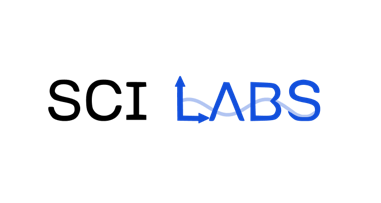

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Cesta svetla - Fermatov princíp a zákon lomu

Snellov zákon opisuje to, ako sa svetlo láme na rozhraní dvoch optických prostredí. Podľa Snellovho zákona je uhol dopadajúceho zväzku $\alpha_1$ a uhol lomeného zväzku $\alpha_2$ previazaný vzťahom

\begin{equation*}
 n_1 \sin{\alpha_1} = n_2 \sin{\alpha_2}
\end{equation*}

kde $n_1$ a $n_2$ sú indexy lomu pôvodného a nového prostredia. Index lomu je daný rýchlosťou $v$ akou sa svetlo šíri v danom optickom prostredí - $n = \frac{c}{v}$, kde $c = 299 792 458 \text{ m/s}$ je rýchlosť svetla vo vákuu .

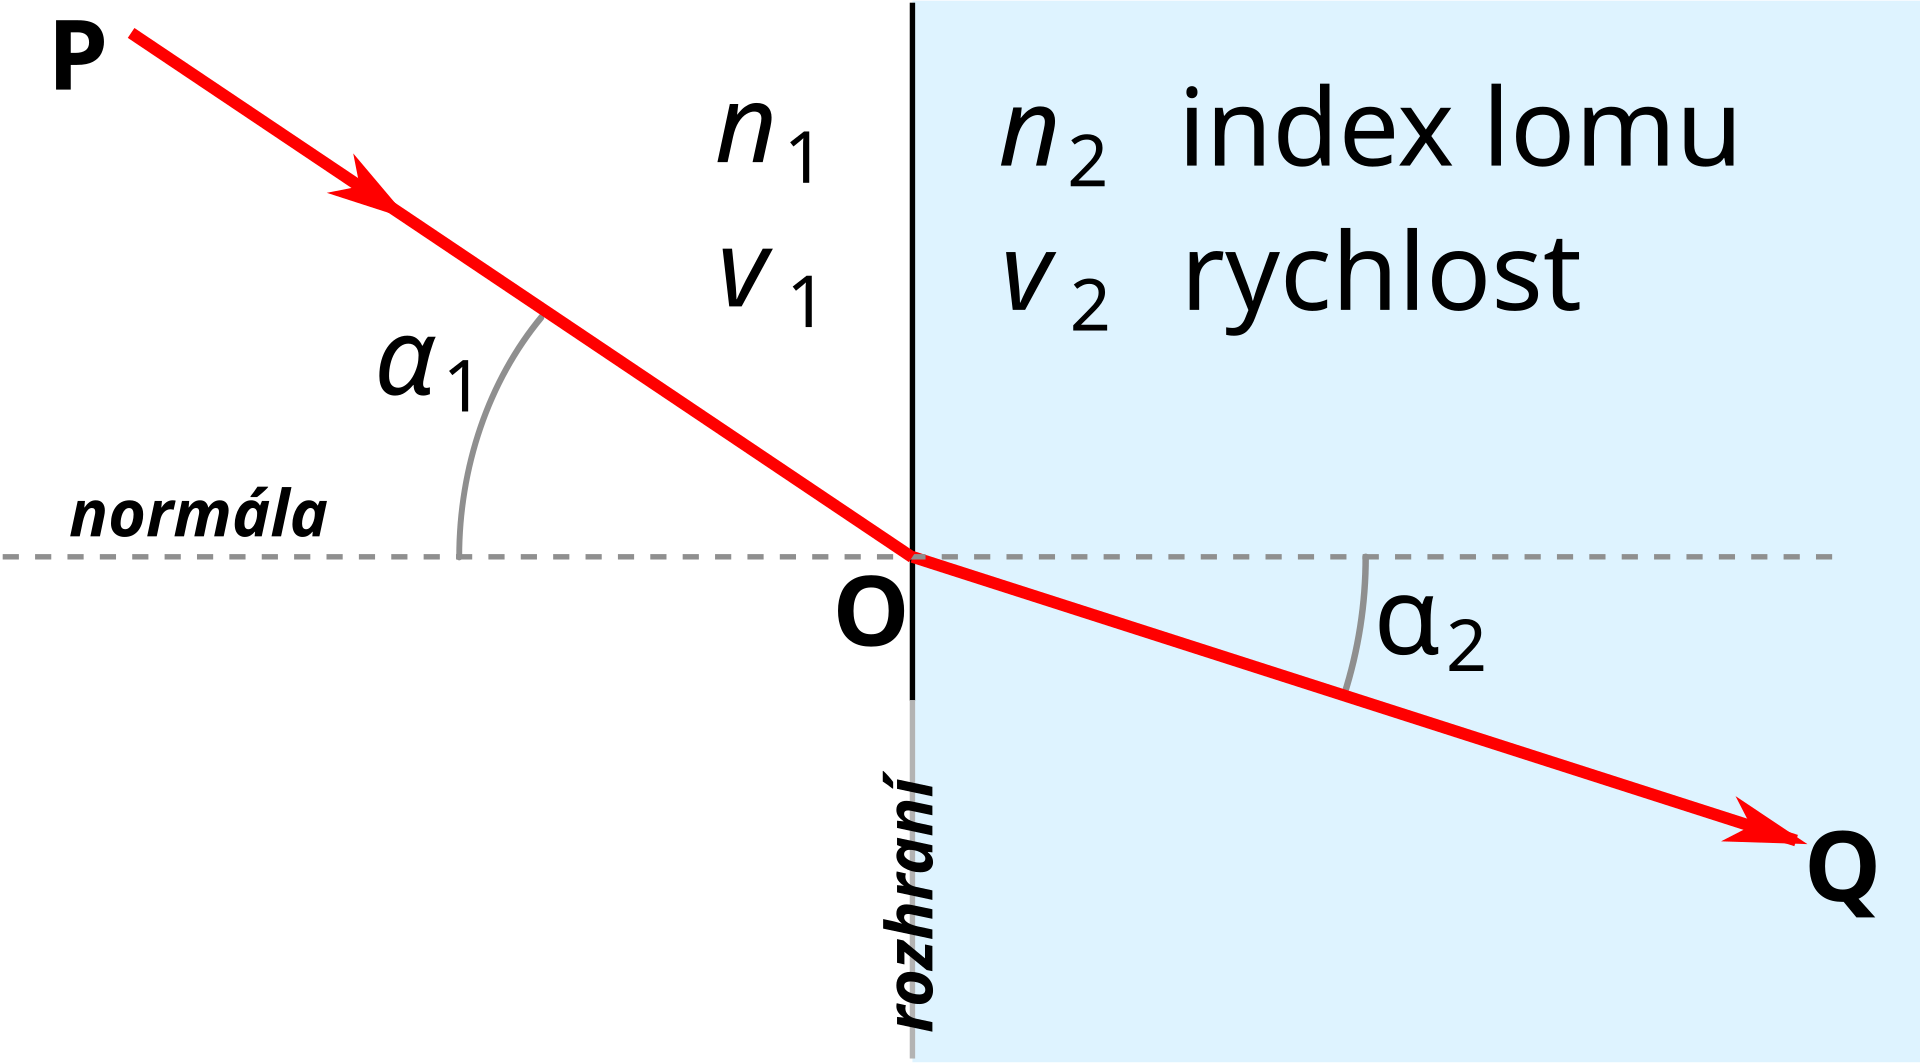

Ekvivalentný popis lomu svetla na rozhraní dvoch optických prostredí poskytuje tzv. Fermatov princíp - *Svetlo sa šíri z jedného bodu do druhého po takej dráhe, aby doba potrebná na prebehnutie tejto dráhy bola čo najmenšia*. V tomto cvičení si numericky ukážeme, že je Fermatov princíp naozaj ekvivalentný Snellovmu zákonu.

Majme svetelný lúč, ktorý sa šíri vzduchom s indexom lomu $n_1 \approx 1$. Lúč doputuje až k rozhraniu so sklom s idexom lomu $n_2 = 1.5$, pod uhlom $\alpha_1 = 30° \approx 0.524 \text{ rad}$. Pod akým uhlom od normálu k rozhraniu sa bude svetelný lúč šíriť ďalej? Použijeme Snellov zákon.

In [ ]:
# Definujeme si funckciu pre výpočet uhla lomu

def snell_law(alpha_1, n_1, n_2):
    return( np.rad2deg(np.arcsin((n_1/n_2)*np.sin(np.deg2rad(alpha_1)))) )

In [ ]:
# Definujeme si vstupné premenné a vložíme ich do funkcie

alpha_1 = 30
n_1 = 1
n_2 = 1.5


print(f"Uhol lomu je a_2 = {snell_law(alpha_1, n_1, n_2):,.2f}°")

Uhol lomu je a_2 = 19.47°


Skúsme vypočítať uhol lomu pomocou Fermatovho princípu. Predpokladáme, že sa lúč šíri po priamke, pokiaľ nedorazí k optickému rozhraniu ako na obrazku nižšie.

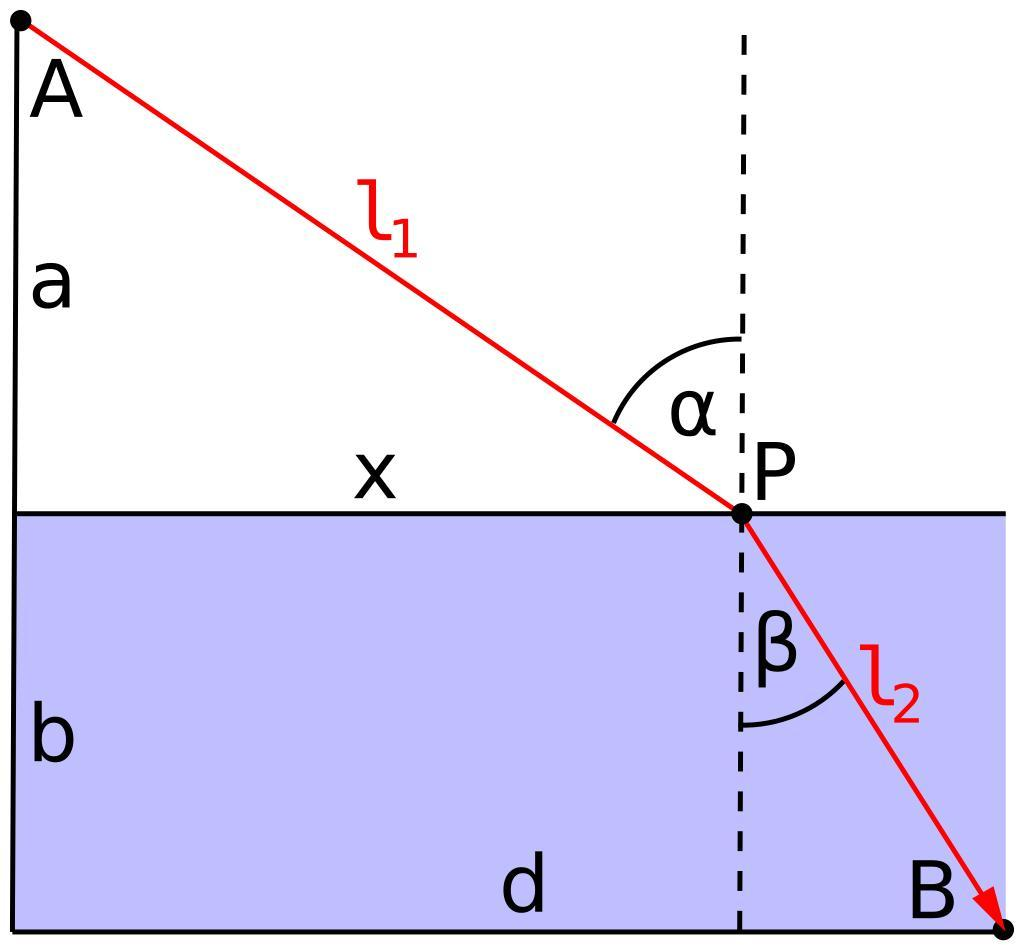
Cesta lúča teda bude tvorená dvoma usečkami $AP$ a $PB$. Zafixujme body $A$ a $B$ a bod $P$ budeme posúvať po optickom rozhraní. Potom spočítame čas, ktorý by svetlo potrebovalo na to, aby sa dostalo z bodu $A$ do bodu $B$ po tejto trajektórii.

Doba, ktorú bude svetlo potrebovať na to, aby sa dostalo z bodu $A$ do bodu $P$ (označme vzálenosť medzi týmito bodmi $l_1 = \sqrt{x^2+a^2}$), je

\begin{equation*}
 t_1 = \frac{l_1}{v_1} = \frac{n_1 \sqrt{x^2+a^2}}{c}
\end{equation*}

a doba, ktorú cestu potrebuje na urazenie vzájomnosti medzi $PB$, je

\begin{equation*}
 t_2 = \frac{l_2}{v_2} = \frac{n_2 \sqrt{(d-x)^2+b^2}}{c}.
\end{equation*}

Povedzme, že $a = b = 1 \text{ m}$ a $d = 0.931 \text{ m}$ (rozmery sú zvolené tak, aby sa overila správnosť prechádzajúceho príkladu). Predpokladáme, že súradnice bodu $P$ bude ležať niekde v intervale $x \in (0 \text{ m},2 \text{ m})$. Poďme počítať!

In [ ]:
#Definujeme si funkcie pre spočítanie vzdialenosti, ktorú lúč prejde, a času, ktorý na to bude potrebovať

def vzdalenost(x,y):
    return(np.sqrt(x**2+y**2))

c = 299792458

def cas(x,y,n):
    return((n*vzdalenost(x,y))/(c))

In [ ]:
# Definujeme si premenné

a = 1                           # [m]
b = 1                           # [m]
d = 0.9309036597828995          # [m] - špeciálna voľba premennej aby sme mohli overiť Snellov zákon pre rovnaký uhol dopadu aj lomu ako v predchádzajúcom výpočte
x = np.linspace(0,d,100000)     # Vygenerujeme si sto tisíc pozícií bodu P

In [ ]:
# Spočítame čas, ktorý bude potrebný na prekonanie dráhy s rôznymi polohami bodu P

t = cas(x,a,n_1)+cas(d-x,b,n_2)

In [ ]:
# Hľadanie minimálneho času t_min as ním spojenej polohy bodu P x_min

x_min = x[0]
t_min = t[0]

for i in range(len(t)):
    if t[i] < t_min:
        t_min = t[i]
        x_min = x[i]

Teraz keď poznáme polohu bodu $P$, pre ktorú je cesta svetka čo najkratšia, môžeme sa pozrieť na uhly dopadu a lomu. Využijeme na to nasledujúce dva vzorce

\begin{gather*}
    \alpha_1 = \arctan(\frac{x_{min}}{a}), \\
    \alpha_2 = \arctan(\frac{d-x_{min}}{b}).
\end{gather*}

In [ ]:
# Definujeme si funkciu na výpočet uhla

def uhol(a,b):
    return(np.rad2deg(np.arctan(a/b)))

In [ ]:
print(f"Pomocou Fermatovho princípu sme vypočítali, že pri uhle dopadu {uhol(x_min,a):,.2f}° (na rozhraní vzduch-sklo) sa svetelný lúč bude lámať pod uhlom {uhol(d-x_min,b):,.2f}° čo súhlasí so Snellovým zákonom.")

Pomocou Fermatovho princípu sme vypočítali, že pri uhle dopadu 30.00° (na rozhraní vzduch-sklo) sa svetelný lúč bude lámať pod uhlom 19.47° čo súhlasí so Snellovým zákonom.


# Numericky sme overili, že Fermatov princíp je naozaj ekvivalentný Snellovmu zákonu. Skúsme si vykresliť pár rôznych dráh a ich časy.   

In [ ]:
# Nachystáme si 5 rôznych polôh bodu P a časov, ktoré sú s týmito polohami spojené
x_help = np.linspace(0,d,5)
t_help = cas(x_help,a,n_1)+cas(d-x_help,b,n_2)

In [ ]:
# Body A a B

A = [0,a]
B = [d,-b]

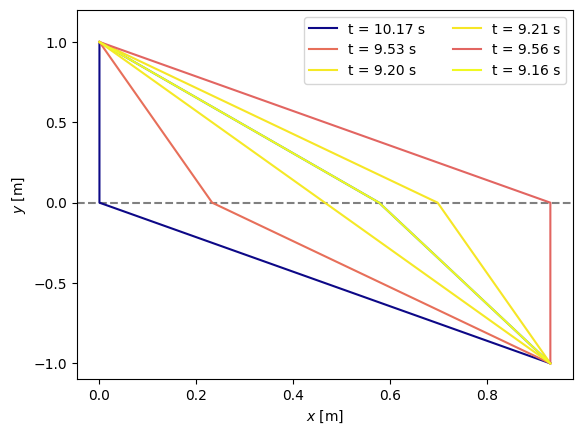

In [ ]:
#Vykreslenie rôznych svetelných dráh s časom, ktorý by bol na prekonanie tejto dráhy potrebný

plt.plot([A[0], x_min, B[0]], [A[1], 0, B[1]])

norm = mcolors.Normalize(vmin=t_min, vmax=np.max(t_help))       #Pomocná funkcia pre priradenie farby k času danej dráhy
cmap = plt.colormaps["plasma_r"]

for i in range(len(x_help)):            #Vykreslenie rôznych trajektórií
    plt.plot([A[0], x_help[i], B[0]], [A[1], 0, B[1]], color = cmap(norm(t_help[i])), zorder = 2, label = f"t = {t_help[i]*1e9:,.2f} s")

plt.plot([A[0], x_min, B[0]], [A[1], 0, B[1]], color = cmap(norm(t_min)), zorder = 2, label = f"t = {t_min*1e9:,.2f} s")        #Vykreslenie najrýchlejšej trajektórie

plt.axhline(0, color = "gray", zorder = 1, linestyle = "--")

plt.ylabel("$y$ [m]")
plt.xlabel("$x$ [m]")

plt.ylim(-1.1, 1.2)
plt.legend(ncol=2)

Ako vidíme, tak z našich pár trajektórií je operavdu najrýchlejšia tá, ktorá súhlasí so Snellovým zákonom.

Poďme si to overiť ešte na viacerých dráhach.

(-1.1, 1.2)

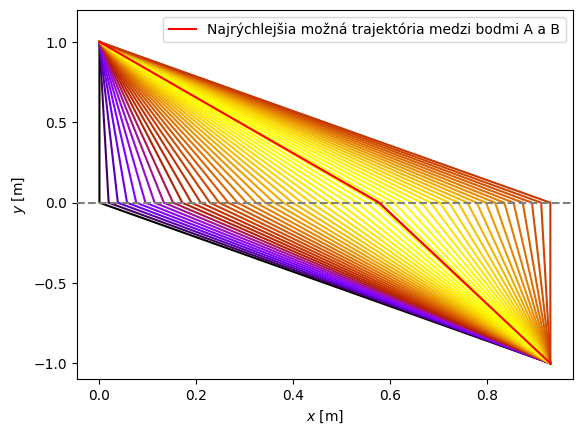

In [ ]:
x_help = np.linspace(0,d,50)
t_help = cas(x_help,a,n_1)+cas(d-x_help,b,n_2)

plt.plot([A[0], x_min, B[0]], [A[1], 0, B[1]])

norm = mcolors.Normalize(vmin=t_min, vmax=np.max(t_help))
cmap = plt.colormaps["gnuplot_r"]


plt.plot([A[0], x_min, B[0]], [A[1], 0, B[1]], color = "red", zorder = 5, label = f"Najrýchlejšia možná trajektória medzi bodmi A a B")

for i in range(len(x_help)):
    plt.plot([A[0], x_help[i], B[0]], [A[1], 0, B[1]], color = cmap(norm(t_help[i])), zorder = 2)

plt.axhline(0, color = "gray", zorder = 4, linestyle = "--")

plt.ylabel("$y$ [m]")
plt.xlabel("$x$ [m]")

plt.legend()

plt.ylim(-1.1, 1.2)